## 逻辑回归

In [128]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [129]:
data = pd.read_excel('fruit_data.xlsx', index_col="ID")
data.sample(5)

,mass,width,height,color_score,fruit_name
ID,,,,,
8,154,7.0,7.1,0.88,apple
29,190,7.5,8.1,0.74,orange
19,170,7.6,7.9,0.88,apple
36,154,7.1,7.5,0.78,orange
23,204,7.5,9.2,0.77,orange


In [130]:
data[data.isnull()['fruit_name'] == True]

,mass,width,height,color_score,fruit_name
ID,,,,,
39,158,7.1,7.6,0.72,NaN
40,190,7.5,7.9,0.77,NaN
41,189,7.6,7.7,0.77,NaN
42,160,7.9,6.9,0.65,NaN


In [131]:
train_X = data[data['fruit_name'].notnull()].iloc[:,:4]
train_y = data[data['fruit_name'].notnull()]['fruit_name']
test_X = data[data.isnull()['fruit_name'] == True].iloc[:,:4]

In [132]:
test_X

,mass,width,height,color_score
ID,,,,
39,158,7.1,7.6,0.72
40,190,7.5,7.9,0.77
41,189,7.6,7.7,0.77
42,160,7.9,6.9,0.65


### 方法一：sklearn.linear_model.LogisticRegression

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
LR = LogisticRegression()
LR.fit(train_X, train_y)

LogisticRegression()

In [135]:
print(LR.score(train_X,train_y))

0.7105263157894737


In [136]:
# 预测
print(LR.predict(test_X))
print(LR.predict_proba(test_X))  # 预测为0和1的概率

['orange' 'orange' 'orange' 'apple']
[[0.45469055 0.54530945]
 [0.36879029 0.63120971]
 [0.45856584 0.54143416]
 [0.81444077 0.18555923]]


### 方法二：statsmodels（结果与SPSS一致）

In [137]:
import statsmodels.api as sm

In [138]:
encoder = LabelEncoder()
train_y_encoded = encoder.fit_transform(train_y)

In [139]:
X1 = sm.add_constant(train_X)
lr = sm.Logit(train_y_encoded, X1)
result = lr.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.449106
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   38
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 Jul 2020   Pseudo R-squ.:                  0.3521
Time:                        13:01:42   Log-Likelihood:                -17.066
converged:                       True   LL-Null:                       -26.340
Covariance Type:            nonrobust   LLR p-value:                 0.0009644
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.2016     14.503      0.497      0.620     -21.224      35.627
mass            0.0238      0.024      0.982      0.326      -0.024       0.071
width          -4.3068      1.844     -2.335      0.020      -7.922      -0.692
height          3.7497      1.641      2.286      0.022       0.534       6.965
color_score    -9.8913      5.746     -1.722      0.085     -21.152       1.370
===============================================================================
"""

In [140]:
result.predict(sm.add_constant(test_X))

ID
39    0.852335
40    0.805467
41    0.553901
42    0.027191
dtype: float64

## 线性判别分析

In [141]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [142]:
lda = LinearDiscriminantAnalysis()
X_r = lda.fit(train_X, train_y)
X_r.coef_

array([[  0.03206332,  -4.57480239,   2.87678633, -10.50469726]])

In [143]:
X_r.score(train_X, train_y)

0.7631578947368421

In [144]:
X_r.predict(test_X)

array(['orange', 'orange', 'orange', 'apple'], dtype='<U6')

In [145]:
# X_r.predict_proba(X)

### 多分类

In [146]:
data2 = pd.read_excel('mul_fruit.xlsx',index_col=0)
data2.sample(5)

,mass,width,height,color_score,fruit_name,kind
ID,,,,,,
60,158,7.1,7.6,0.72,NaN,NaN
63,160,7.9,6.9,0.65,NaN,NaN
20,194,7.2,10.3,0.70,lemon,2.0
41,160,7.0,7.4,0.81,orange,3.0
66,92,7.1,5.4,0.79,NaN,NaN


In [147]:
train_X2 = data2[data2['fruit_name'].notnull()].iloc[:,:4]
train_y2 = data2[data2['fruit_name'].notnull()]['fruit_name']
test_X2 = data2[data2.isnull()['fruit_name'] == True].iloc[:,:4]

In [148]:
lda = LinearDiscriminantAnalysis()
X_r2 = lda.fit(train_X2, train_y2)

In [149]:
X_r2.score(train_X2,train_y2)

0.8305084745762712

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.concat([train_X2,train_y2], axis=1)

Text(0.5, 1.0, 'LDA of FRUITS dataset')

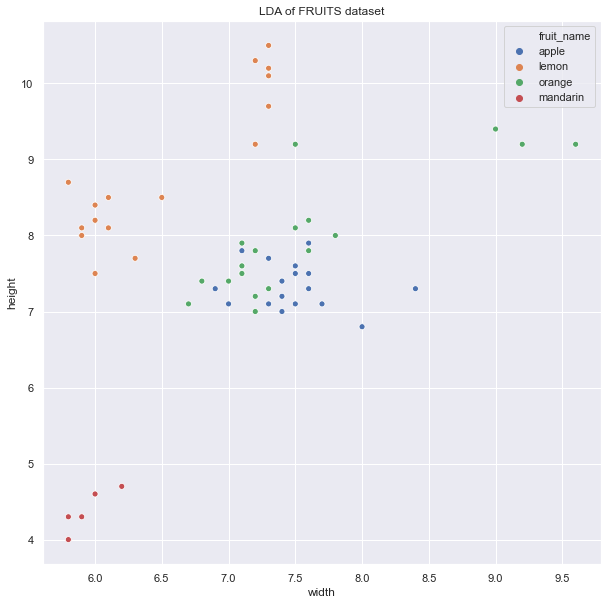

In [152]:
sns.set()
plt.figure(figsize=(10,10))

sns.scatterplot('width',
                'height',
                data=df,
                hue='fruit_name')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of FRUITS dataset')

In [153]:
np.set_printoptions(suppress=True)  # 不使用用科学计数法
# X_r2.predict_proba(X)